In [1]:
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.0


In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
IMAGE_SIZE = [128, 128]
train_path = 'D://FYP Project//Dataset//Train'
valid_path = 'D://FYP Project//Dataset//Validation'

In [4]:
print("Training Data:")
for expression in os.listdir("D://FYP Project//Dataset//Train"):
    print(str(len(os.listdir("D://FYP Project//Dataset//Train//"+expression))) + " " + expression + " images.")
print("\nValidation Data:")    
for expression in os.listdir("D://FYP Project//Dataset//Validation"):
    print(str(len(os.listdir("D://FYP Project//Dataset//Validation//"+expression))) + " " + expression + " images.")

Training Data:
70001 Fake images.
70001 Real images.

Validation Data:
19641 Fake images.
19787 Real images.


In [5]:
ig = ImageDataGenerator(rescale=1./255.)
train_flow = ig.flow_from_directory(
    'D://FYP Project//Dataset//Train',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

ig1 = ImageDataGenerator(rescale=1./255.)
valid_flow = ig1.flow_from_directory(
    'D://FYP Project//Dataset//Validation',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [6]:
train_flow.class_indices

{'Fake': 0, 'Real': 1}

In [7]:
input_shape=(128,128,3)
batch_size=64


def build_model():
    densenet = ResNet50(
                        weights='imagenet',
                        include_top=False,
                        input_shape=input_shape
                        )
    model = Sequential([densenet,
                        layers.GlobalAveragePooling2D(),
                        layers.Dense(512,activation='relu'),
                        layers.BatchNormalization(),
                        layers.Dense(2, activation='softmax')
                        ])
    model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    return model


model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,639,874
Trainable params: 24,585,730
No

C:\Users\ABDULLAH\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
r = model.fit(
  train_flow,
  validation_data=valid_flow,
  epochs=50,
  steps_per_epoch=80,
)

Epoch 1/50
80/80 [==============================] - 966s 12s/step - loss: 0.3819 - accuracy: 0.8604 - val_loss: 1.4527 - val_accuracy: 0.5019
Epoch 2/50
80/80 [==============================] - 630s 8s/step - loss: 0.1582 - accuracy: 0.9387 - val_loss: 0.8878 - val_accuracy: 0.5019
Epoch 3/50
80/80 [==============================] - 588s 7s/step - loss: 0.1329 - accuracy: 0.9465 - val_loss: 0.7167 - val_accuracy: 0.5019
Epoch 4/50
80/80 [==============================] - 431s 5s/step - loss: 0.1365 - accuracy: 0.9479 - val_loss: 0.9925 - val_accuracy: 0.5019
Epoch 5/50
80/80 [==============================] - 431s 5s/step - loss: 0.1161 - accuracy: 0.9529 - val_loss: 0.8173 - val_accuracy: 0.5020
Epoch 6/50
80/80 [==============================] - 431s 5s/step - loss: 0.1107 - accuracy: 0.9553 - val_loss: 0.6557 - val_accuracy: 0.5311
Epoch 7/50
80/80 [==============================] - 431s 5s/step - loss: 0.0927 - accuracy: 0.9650 - val_loss: 0.8961 - val_accuracy: 0.5373
Epoch 8/50
8

In [10]:
model.save('ResNet_50trainedmodel.h5')

In [11]:
import matplotlib.pyplot as plt

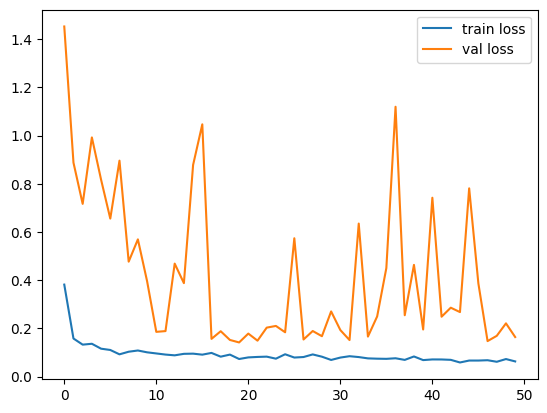

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('ResnetLossVal_loss')

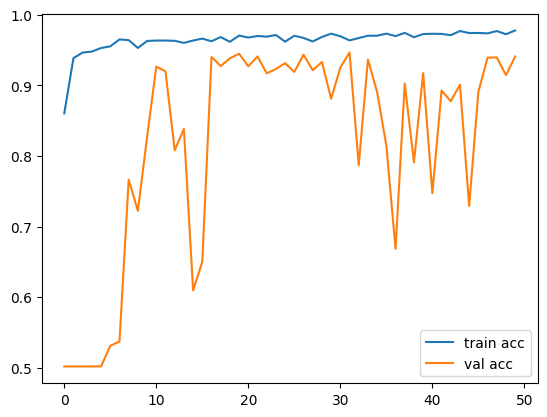

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('ResnetAccVal_acc')